In [1]:
#ボストン住宅価格データセットの読み込み
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


In [2]:
# 説明変数（入力）
X = boston.data

# 目的変数（出力）
y = boston.target

## PANDASでデータを可視化

In [3]:
import pandas as pd
import numpy as np
from IPython.display import display

df = pd.DataFrame(X, columns = boston.feature_names).assign(MEDV = np.array(y))

# データを表示（先頭5個だけ）
display(df.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# ランダムに取り出す
random_sampling = df.sample(n=8, random_state=2)
display(random_sampling)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
463,5.82115,0.0,18.10,0.0,0.713,6.513,89.9,2.8016,24.0,666.0,20.2,393.82,10.29,20.2
152,1.12658,0.0,19.58,1.0,0.871,5.012,88.0,1.6102,5.0,403.0,14.7,343.28,12.12,15.3
291,0.07886,80.0,4.95,0.0,0.411,7.148,27.7,5.1167,4.0,245.0,19.2,396.90,3.56,37.3
183,0.10008,0.0,2.46,0.0,0.488,6.563,95.6,2.8470,3.0,193.0,17.8,396.90,5.68,32.5
384,20.08490,0.0,18.10,0.0,0.700,4.368,91.2,1.4395,24.0,666.0,20.2,285.83,30.63,8.8
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41,14.4
240,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,16.6,391.25,11.38,22.0
349,0.02899,40.0,1.25,0.0,0.429,6.939,34.5,8.7921,1.0,335.0,19.7,389.85,5.89,26.6


In [5]:
# RMのみを選択
room = random_sampling.iloc[:, 5]
print("部屋数")
display(room)

# MDEVのみを選択
value = random_sampling.iloc[:, 13]
print("\n価格")
display(value)

部屋数


463    6.513
152    5.012
291    7.148
183    6.563
384    4.368
141    5.019
240    6.897
349    6.939
Name: RM, dtype: float64


価格


463    20.2
152    15.3
291    37.3
183    32.5
384     8.8
141    14.4
240    22.0
349    26.6
Name: MEDV, dtype: float64

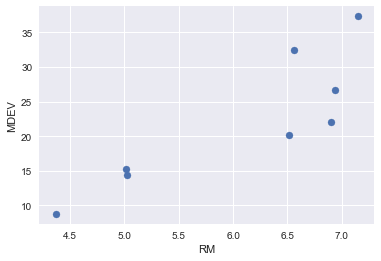

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

x = np.array(room)
y = np.array(value)

plt.scatter(x, y)
plt.xlabel("RM")
plt.ylabel("MDEV")

# 表示
plt.show()

In [8]:
# 手がかりとして RM のみを使用する
RM = random_sampling[['RM']].as_matrix() # 二次元配列
print("部屋数")
display(RM)

# 予測したい MDEV を選択
MDEV = random_sampling.iloc[:, 13] # 一次元配列
print("\n価格")
display(MDEV)

部屋数


array([[6.513],
       [5.012],
       [7.148],
       [6.563],
       [4.368],
       [5.019],
       [6.897],
       [6.939]])


価格


463    20.2
152    15.3
291    37.3
183    32.5
384     8.8
141    14.4
240    22.0
349    26.6
Name: MEDV, dtype: float64

In [9]:
# 説明変数はRM(x), 目的変数は価格(y)
X = np.array(RM)
y = np.array(MDEV)

print(X.shape)
print(y.shape)

(8, 1)
(8,)


In [10]:
from sklearn.model_selection import train_test_split

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 線形回帰で学習
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

# 訓練データの評価
print("Training set score: ", lr.score(X_train, y_train))

# テストデータの評価（未知のデータに対する予測精度）
print("Test set score: ", lr.score(X_test, y_test))

Training set score:  0.7946023655026079
Test set score:  0.21820996038060003


In [11]:
print("coefficient: ", lr.coef_) # 説明変数の係数
print("intercept : ", lr.intercept_) # 切片

coefficient:  [7.2940319]
intercept :  -22.202802305183067


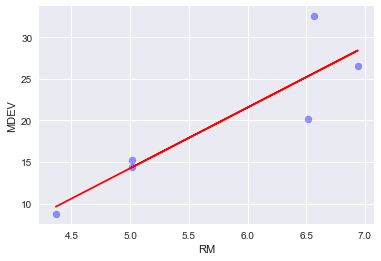

In [12]:
plt.scatter(X_train, y_train, color = "blue", alpha = 0.4)
plt.plot(X_train, lr.predict(X_train), color = "red") # 回帰直線をプロット

#plt.title("X_Train")
plt.xlabel("RM")
plt.ylabel("MDEV")

plt.show()

In [13]:
# 手がかりとして RM のみを使用する
RM = df[['RM']].as_matrix() # 二次元配列
print("部屋数")
display(RM[:5])

# 予測したい MDEV を選択
MDEV = df.iloc[:, 13] # 一次元配列
print("\n価格")
display(MDEV[:5])

部屋数


array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147]])


価格


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [14]:
# 説明変数はRM(x), 目的変数は価格(y)
X = np.array(RM)
y = np.array(MDEV)

print(X.shape)
print(y.shape)

(506, 1)
(506,)


In [15]:
from sklearn.model_selection import train_test_split

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 線形回帰で学習
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

# 訓練データの評価
print("Training set score: ", lr.score(X_train, y_train))

# テストデータの評価（未知のデータに対する予測精度）
print("Test set score: ", lr.score(X_test, y_test))

Training set score:  0.48752067939343646
Test set score:  0.46790005431367815


In [16]:
print("coefficient: ", lr.coef_) # 説明変数の係数
print("intercept : ", lr.intercept_) # 切片

coefficient:  [9.31294923]
intercept :  -36.180992646339185


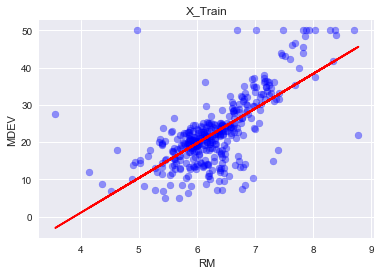

In [17]:
plt.scatter(X_train, y_train, color = "blue", alpha = 0.4)
plt.plot(X_train, lr.predict(X_train), color = "red") # 回帰直線をプロット

plt.title("X_Train")
plt.xlabel("RM")
plt.ylabel("MDEV")

plt.show()

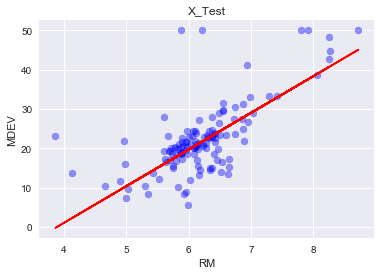

In [18]:
plt.scatter(X_test, y_test, color = "blue", alpha = 0.4)
plt.plot(X_test, lr.predict(X_test), color = "red")

plt.title("X_Test")
plt.xlabel("RM")
plt.ylabel("MDEV")

plt.show()

## RANSAC

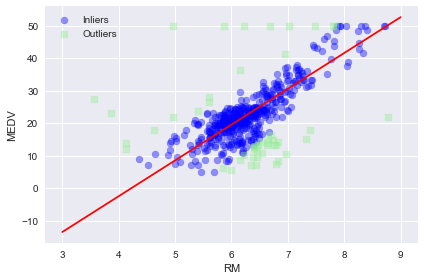

In [20]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(linear_model.LinearRegression(),
                         max_trials=100, 
                         min_samples=50, 
                         loss='absolute_loss', 
                         residual_threshold=10.0, 
                         random_state=0)

ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='blue', marker='o', label='Inliers', alpha="0.4")
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='lightgreen', marker='s', label='Outliers', alpha="0.4")
plt.plot(line_X, line_y_ransac, color='red')   
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./figures/ransac_fit.png', dpi=300)
plt.show()

In [21]:
# 線形回帰
print("coefficient: ", lr.coef_)
print("intercept : ", lr.intercept_)

# RANSAC
print('\nSlope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

coefficient:  [9.31294923]
intercept :  -36.180992646339185

Slope: 11.026
Intercept: -46.621


In [22]:
y_train_pred = ransac.predict(X_train)
print("y_train predict:\n ", y_train_pred[:5])

y_test_pred = ransac.predict(X_test)
print("\ny_test predict:\n ", y_test_pred[:5])

y_train predict:
  [15.17791261 18.7281604  33.50248349 24.72609455 28.15506058]

y_test predict:
  [23.20455978 21.91456291 23.64558435 12.35535536 22.09097274]


In [23]:
from sklearn.metrics import r2_score

# データが無くなったわけではないので、精度はむしろ落ちる
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

R^2 train: 0.469, test: 0.437


## 重回帰（特徴量２個、３個）

In [24]:
# 手がかりに RM, LSTATを使用し、重回帰を行う
lr2 = df[['RM', 'LSTAT']].as_matrix() # 二次元配列
print("部屋数と低所得者の割合")
display(lr2[:5])

# 予測したい MDEV を選択
MDEV2 = df.iloc[:, 13] # 一次元配列
print("\n価格")
display(MDEV2[:5])

部屋数と低所得者の割合


array([[6.575, 4.98 ],
       [6.421, 9.14 ],
       [7.185, 4.03 ],
       [6.998, 2.94 ],
       [7.147, 5.33 ]])


価格


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [25]:
# 説明変数はRM, LSTATの２つ(x[0]とx[1]), 目的変数は価格(y)
X2 = np.array(lr2)
y2 = np.array(MDEV2)

print(X2.shape)
print(y2.shape)

(506, 2)
(506,)


In [26]:
from sklearn.model_selection import train_test_split

# 訓練データとテストデータに分割
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=0)

# 線形回帰で学習
from sklearn import linear_model
lr2 = linear_model.LinearRegression()
lr2.fit(X2_train, y2_train)

# 訓練データの評価
print("Training set score: ", lr2.score(X2_train, y2_train))

# テストデータの評価（未知のデータに対する予測精度）
print("Test set score: ", lr2.score(X2_test, y2_test))

Training set score:  0.65978465698869
Test set score:  0.5692445415835345


In [27]:
# 手がかりに RM, LSTAT, NOX を使用し、重回帰を行う
lr3 = df[['RM', 'LSTAT', 'NOX']].as_matrix() # 二次元配列
print("部屋数と低所得者の割合と窒素酸化物の濃度")
display(lr3[:5])

# 予測したい MDEV を選択
MDEV3 = df.iloc[:, 13] # 一次元配列
print("\n価格")
display(MDEV3[:5])

部屋数と低所得者の割合と窒素酸化物の濃度


array([[6.575, 4.98 , 0.538],
       [6.421, 9.14 , 0.469],
       [7.185, 4.03 , 0.469],
       [6.998, 2.94 , 0.458],
       [7.147, 5.33 , 0.458]])


価格


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [28]:
# 説明変数はRM, LSTAT, NOXの3つ(x[0],x[1],x[2]), 目的変数は価格(y)
X3 = np.array(lr3)
y3 = np.array(MDEV3)

print(X3.shape)
print(y3.shape)

(506, 3)
(506,)


In [29]:
from sklearn.model_selection import train_test_split

# 訓練データとテストデータに分割
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=0)

# 線形回帰で学習
from sklearn import linear_model
lr3 = linear_model.LinearRegression()
lr3.fit(X3_train, y3_train)

# 訓練データの評価
print("Training set score: ", lr3.score(X3_train, y3_train))

# テストデータの評価（未知のデータに対する予測精度）
print("Test set score: ", lr3.score(X3_test, y3_test))

Training set score:  0.6611741553760824
Test set score:  0.5650079648118403


## 特徴量13個から価格を予測する

In [30]:
#ボストン住宅価格データセットの読み込み
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

X = boston.data
y = boston.target

Data shape: (506, 13)


In [31]:
import pandas as pd
from IPython.display import display

df = DataFrame(X, columns = boston.feature_names).assign(MEDV = np.array(y))

display(df.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [32]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [33]:
# 線形回帰
from sklearn.linear_model import LinearRegression

slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

# モデルの評価

## 高次元の可視化

In [34]:
import pandas as pd
df = pd.DataFrame(X)

# 特徴量の確認
display(df.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


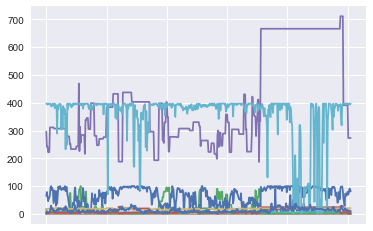

In [35]:
plt.plot(df)
plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off') 

## 残差プロット

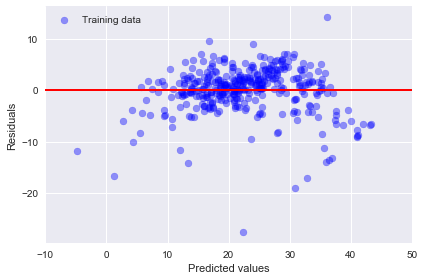

In [36]:
# 高次元のプロットは非現実的なため、残差プロットを使う
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data', alpha=0.4)

# 訓練データ
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()

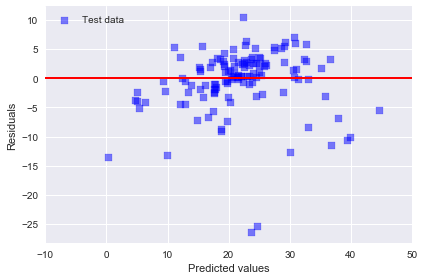

In [37]:
# Test data
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='blue', marker='s', label='Test data', alpha=0.5)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()

In [38]:
# スコアメソッドによる評価
print("Training set score: ", slr.score(X_train, y_train))
print("Test set score: ", slr.score(X_test, y_test))

Training set score:  0.769744837056394
Test set score:  0.6353620786674666


In [39]:
# MSE と R^2による評価
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 19.643, test: 29.791
R^2 train: 0.770, test: 0.635


In [40]:
# sklearn に RMSE は実装されていないため、numpyを使用(np.sqrt)
import numpy as np

print('RMSE train: %.3f, test: %.3f' % (
        np.sqrt(mean_squared_error(y_train, y_train_pred)),
        np.sqrt(mean_squared_error(y_test, y_test_pred)))
     )

RMSE train: 4.432, test: 5.458


## 105個の特徴量を使って学習

In [41]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


In [42]:
poly = PolynomialFeatures(degree=2).fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [43]:
import pandas as pd
df_poly = pd.DataFrame(X_train_poly)

# 特徴量の確認
display(df_poly.head())

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,1.0,0.19133,22.0,5.86,0.0,0.431,5.605,70.2,7.9549,7.0,...,108900.0,6303.0,128412.90,6091.80,364.81,7432.383,352.586,151422.1569,7183.3398,340.7716
1,1.0,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,...,80656.0,5594.8,112719.60,2618.48,388.09,7818.930,181.634,157529.6100,3659.4180,85.0084
2,1.0,0.10469,40.0,6.41,1.0,0.447,7.267,49.0,4.7872,4.0,...,64516.0,4470.4,98869.50,1536.70,309.76,6850.800,106.480,151515.5625,2354.9625,36.6025
3,1.0,8.71675,0.0,18.10,0.0,0.693,6.471,98.8,1.7257,24.0,...,443556.0,13453.2,261058.68,11401.92,408.04,7917.996,345.824,153648.3204,6710.6976,293.0944
4,1.0,10.83420,0.0,18.10,0.0,0.679,6.782,90.8,1.8195,24.0,...,443556.0,13453.2,14365.62,17176.14,408.04,435.714,520.958,465.2649,556.2903,665.1241


In [ ]:
# 特徴量の組み合わせ(積)
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

In [45]:
# 線形回帰で学習
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_train_poly, y_train)

# 訓練データの評価
print("Training set score: ", lr.score(X_train_poly, y_train))

# テストデータの評価（未知のデータに対する予測精度）
print("Test set score: ", lr.score(X_test_poly, y_test))

y_train_pred = lr.predict(X_train_poly)
y_test_pred = lr.predict(X_test_poly)

Training set score:  0.9391468201035316
Test set score:  0.5875484761677864


In [46]:
# RMSE と R^2による評価
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

print('RMSE train: %.3f, test: %.3f' % (
        np.sqrt(mean_squared_error(y_train, y_train_pred)),
        np.sqrt(mean_squared_error(y_test, y_test_pred)))
     )

R^2 train: 0.939, test: 0.588
RMSE train: 2.278, test: 5.805


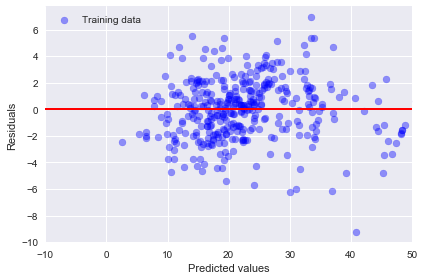

In [47]:
# 特徴量105個の残差プロット
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data', alpha=0.4)

# Train data
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()

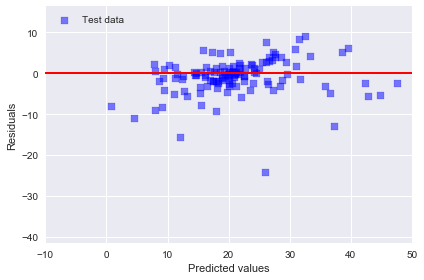

In [48]:
# Test data（y軸の誤差に注意）
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='blue', marker='s', label='Test data', alpha=0.5)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()

## Ridge回帰

In [49]:
from sklearn.linear_model import Ridge

# 特徴量105個
ridge = Ridge(alpha=10).fit(X_train_poly, y_train)
print("X_train score: {:.2f}".format(ridge.score(X_train_poly, y_train)))
print("X_test score: {:.2f}".format(ridge.score(X_test_poly, y_test)))

y_train_pred = ridge.predict(X_train_poly)
y_test_pred = ridge.predict(X_test_poly)

X_train score: 0.94
X_test score: 0.72


In [50]:
# RMSE と R^2による評価
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

print('RMSE train: %.3f, test: %.3f' % (
        np.sqrt(mean_squared_error(y_train, y_train_pred)),
        np.sqrt(mean_squared_error(y_test, y_test_pred)))
     )

R^2 train: 0.942, test: 0.715
RMSE train: 2.225, test: 4.825


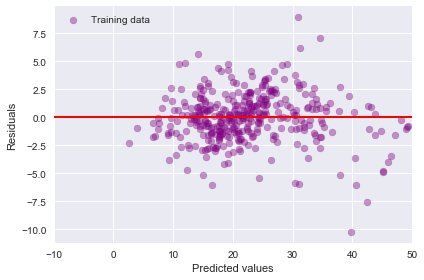

In [51]:
# 特徴量105個の残差プロット
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='purple', marker='o', label='Training data', alpha=0.4)

# Train data
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()

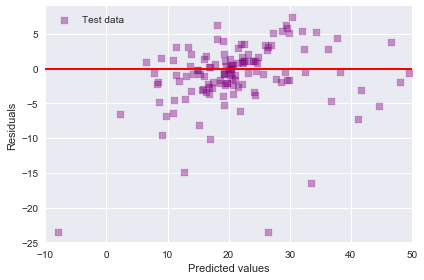

In [52]:
# Test data（y軸の誤差に注意）
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='purple', marker='s', label='Test data', alpha=0.4)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()

## Lasso回帰

In [61]:
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso(max_iter=100000).fit(X_train_poly, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train_poly, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test_poly, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

y_train_pred = lasso.predict(X_train_poly)
y_test_pred = lasso.predict(X_test_poly)

Training set score: 0.91
Test set score: 0.73
Number of features used: 47


In [62]:
# RMSE と R^2による評価
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

print('RMSE train: %.3f, test: %.3f' % (
        np.sqrt(mean_squared_error(y_train, y_train_pred)),
        np.sqrt(mean_squared_error(y_test, y_test_pred)))
     )

R^2 train: 0.911, test: 0.726
RMSE train: 2.760, test: 4.731


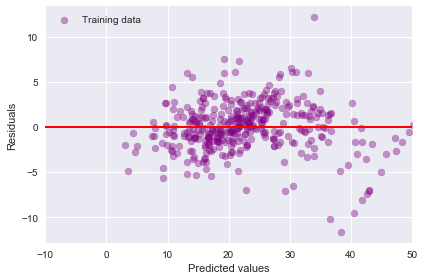

In [63]:
# 特徴量105個の残差プロット
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='purple', marker='o', label='Training data', alpha=0.4)

# Train data
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()

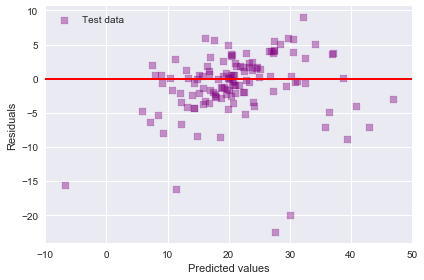

In [64]:
# Test data（y軸の誤差に注意）
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='purple', marker='s', label='Test data', alpha=0.4)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()

In [ ]:
lasso001 = Lasso(alpha=0.1, max_iter=100000).fit(X_train_poly, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train_poly, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test_poly, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

y_train_pred = lasso001.predict(X_train_poly)
y_test_pred = lasso001.predict(X_test_poly)